<a href="https://colab.research.google.com/github/saltypotato227/Game-Review-Code-Data-RT/blob/main/JEI_Rating_Estimator_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

In [9]:
df = pd.read_csv('/content/drive/MyDrive/Game Review Full Data.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Games ≤ 15 Moves.csv')
df3 = pd.read_csv('/content/drive/MyDrive/360 Games Data.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Games Greater than 15 Moves.csv')

In [6]:
import matplotlib.pyplot as plt

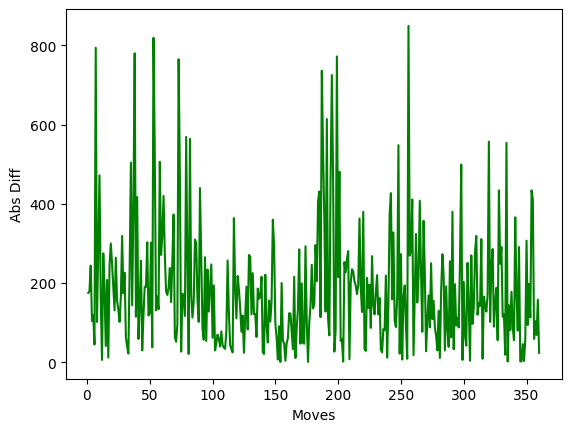

In [26]:
# Figure 1: Absolute Difference between Predicted and Actual Rating for Total Data.

x = df3["Game"]
y1 = df3["Abs Diff"]
plt.plot(x,y1, color="green")
plt.plot()
plt.xlabel('Moves')
plt.ylabel('Abs Diff')
plt.show()

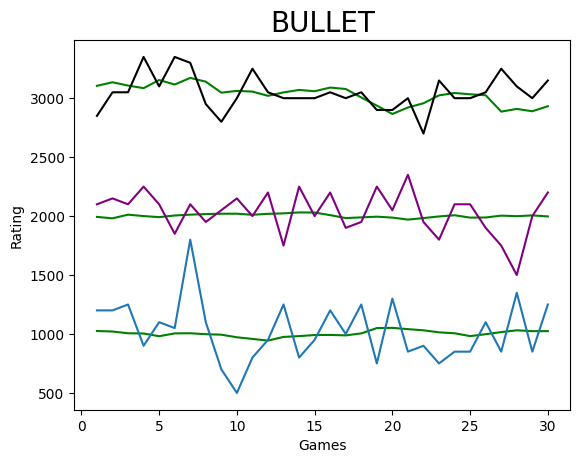

In [28]:
# Figure 2a: Effect of Skill Level on the Estimator in the Bullet Time Control

x = df["Game"]
y1 = df["Act Beg Bullet"]
y2 = df["Pred Beg Bullet"]
y3 = df["Act GM Bullet"]
y4 = df["Pred GM Bullet"]
y5 = df["Act Adv Bullet"]
y6 = df["Pred Adv Bullet"]
plt.plot(x,y1, color="green")
plt.plot(x,y2)
plt.plot(x,y3, color="green")
plt.plot(x,y4, color="black")
plt.plot(x,y5, color="green")
plt.plot(x,y6, color="purple")
plt.xlabel('Games')
plt.ylabel('Rating')
plt.title('BULLET', fontsize=20)
plt.show()

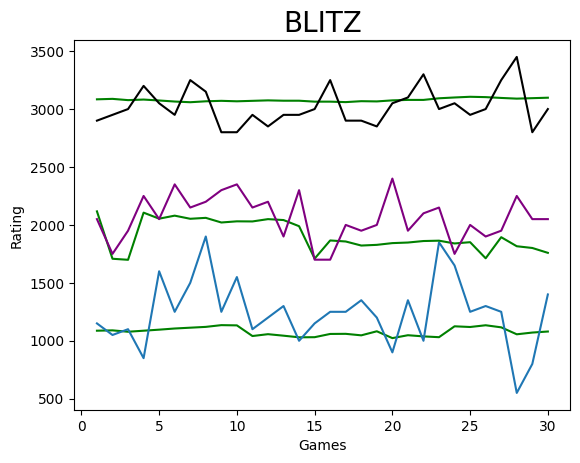

In [27]:
# Figure 2b: Effect of Skill Level on the Estimator in the Blitz Time Control

x = df["Game"]
y1 = df["Act Beg Blitz"]
y2 = df["Pred Beg Blitz"]
y3 = df["Act GM Blitz"]
y4 = df["Pred GM Blitz"]
y5 = df["Act Adv Blitz"]
y6 = df["Pred Adv Blitz"]
plt.plot(x,y1, color="green")
plt.plot(x,y2)
plt.plot(x,y3, color="green")
plt.plot(x,y4, color="black")
plt.plot(x,y5, color="green")
plt.plot(x,y6, color="purple")
plt.xlabel('Games')
plt.ylabel('Rating')
plt.title('BLITZ', fontsize=20)
plt.show()

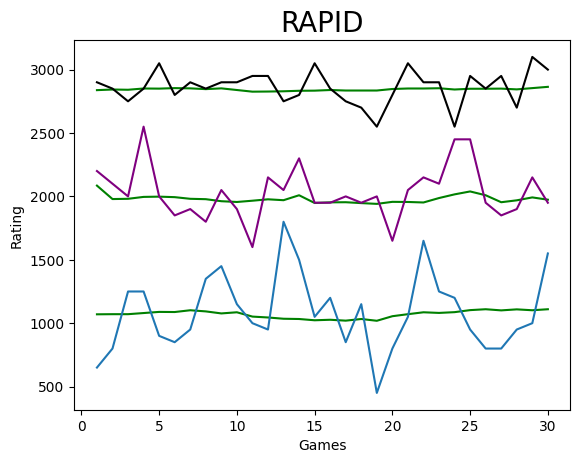

In [29]:
# Figure 2c: Effect of Skill Level on the Estimator in the Rapid Time Control

x = df["Game"]
y1 = df["Act Beg Rapid"]
y2 = df["Pred Beg Rapid"]
y3 = df["Act GM Rapid"]
y4 = df["Pred GM Rapid"]
y5 = df["Act Adv Rapid"]
y6 = df["Pred Adv Rapid"]
plt.plot(x,y1, color="green")
plt.plot(x,y2)
plt.plot(x,y3, color="green")
plt.plot(x,y4, color="black")
plt.plot(x,y5, color="green")
plt.plot(x,y6, color="purple")
plt.xlabel('Games')
plt.ylabel('Rating')
plt.title("RAPID", fontsize=20)
plt.savefig('graph.png')
plt.show()

In [13]:
# Example Statistical Script using Beginner Bullet
# This is how to find the t-statistic and the p-value for each of the 12 samples

from scipy import stats

df["Bullet Beg Diff"] = abs(df["Act Beg Bullet"] - df["Pred Beg Bullet"])
data = df["Bullet Beg Diff"]
null_mean = 100

t_statistic, p_value = stats.ttest_1samp(data, null_mean, alternative='greater')

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 3.7363588872407676
p-value: 0.0004071967186618417


In [14]:
mean = df["Bullet Beg Diff"].mean()

print("μ |difference|:", mean)

μ |difference|: 202.13333333333333


In [15]:
std_deviation = df["Bullet Beg Diff"].std()

print("Standard Deviation:", std_deviation)

Standard Deviation: 149.7199070755544


In [31]:
# Comparing Standard Deviations between Short and Long Games

std_deviation1 = df4["Abs Diff"].std()

print("Standard Deviation for Long (>15) Games:", std_deviation1)

std_deviation2 = df2["Abs Diff"].std()

print("Standard Deviation for Short (≤15) Games:", std_deviation2)

Standard Deviation for Long (>15) Games: 141.2707697587138
Standard Deviation for Short (≤15) Games: 245.0697441284409


In [17]:
# Running Welch's t-test on Short vs. Long Game data to determine if results are significant

from scipy import stats

short_game_errors = df2["Abs Diff"]
long_game_errors = df4["Abs Diff"]

t_statistic, p_value = stats.ttest_ind(short_game_errors, long_game_errors, equal_var=False)

print("Welch’s t-test result:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

alpha = 0.01
if p_value < alpha:
    print("Statistically significant difference at α = 0.01")
else:
    print("Not statistically significant at α = 0.01")


Welch’s t-test result:
t-statistic: 3.0198520931923167
p-value: 0.005419059790340066
Statistically significant difference at α = 0.01


Text(0, 0.5, 'Average Absolute Prediction Error')

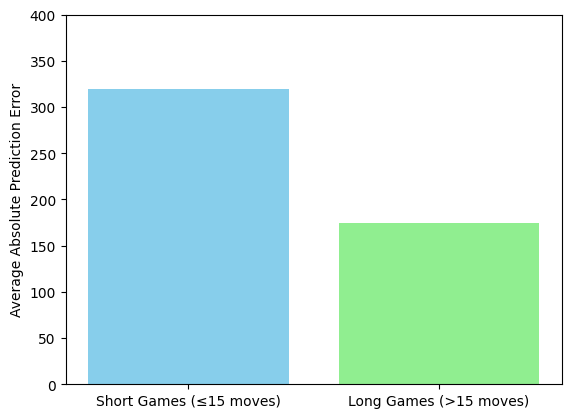

In [32]:
# Figure 3: Average Error in Rating Predictions for Short (≤15) vs. Long (>15) Games.

means = [short_game_errors.mean(), long_game_errors.mean()]
labels = ['Short Games (≤15 moves)', 'Long Games (>15 moves)']
fig, ax = plt.subplots()
bars = ax.bar(labels, means, capsize=10, color=['skyblue', 'lightgreen'])
ax.set_ylim(0, 400)
plt.ylabel('Average Absolute Prediction Error')